In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import collections
import pandas as pd
import numpy as np
import os


#[-]File to Load
#jupyter does not recognize __file__ adding this to avoid
#rewriting the code if it gets exported
try:
    __thisdir__ = os.path.dirname(os.path.abspath(__file__))
except NameError as error:
    __thisdir__ = "."

__csv_path_city__ = os.path.join(__thisdir__,"data","city_data.csv")
__csv_path_ride__ = os.path.join(__thisdir__,"data","ride_data.csv")

# Read the City and Ride Data
city_data = pd.read_csv(__csv_path_city__)
ride_data = pd.read_csv(__csv_path_ride__)

# Combine the data into a single dataset
pyber_data = pd.merge(ride_data,city_data,on="city",how='outer')

# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

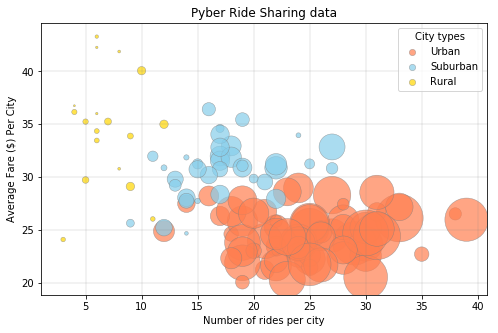

In [2]:
#Named tutple used for the data frame and plotting
__PyberData__ = collections.namedtuple('__PyberData__',
                                       ['avg',
                                        'rides',
                                        'drivers',
                                        'type'])

PyberData = __PyberData__("Average Fare ($) Per City",
                          "Number of rides per city",
                          "Total Number of Drivers (Per City)",
                          "Type")

#Data manipulation for further plotting
#[-]Average Fare ($) Per City
avg_per_city = round(pyber_data.groupby("city").mean()["fare"],2)
#[-]Total Number of Rides Per City
total_rides = pyber_data.groupby("city").count()["ride_id"]
#[-]Total Number of Drivers Per City
total_driver = pyber_data.groupby("city").sum()["driver_count"]
#[-]Color 
type_city = pd.DataFrame(pyber_data[["city","type"]])
type_city.drop_duplicates(inplace=True)
type_city.set_index("city", inplace=True)
ride_type = type_city["type"]
#Data frame creation
#Create a data frame that encapsulate all the information
city_info_df = pd.DataFrame({PyberData.avg:avg_per_city,
                             PyberData.rides:total_rides,
                             PyberData.drivers:total_driver,
                             PyberData.type:ride_type})
#Figure for the plot
bubbles_mpl = plt.figure(figsize=(8,5))

#Creates a dictionary to select the items to plot and their color
#By doing this we can control the data we want to plot without
#modifying the data frame
plot_color_cfg = {"Urban": "Coral",
                  "Suburban": "SkyBlue",
                  "Rural":"Gold"}

#Plot the dictionary
for ride_type, color in  plot_color_cfg.items():
    #Creat ethe query to get the data
    query = f"Type == \"{ride_type}\""
    #query the data
    temp_df = city_info_df.query(query)
    plt.scatter(x=temp_df[PyberData.rides],
                y=temp_df[PyberData.avg],
                s=temp_df[PyberData.drivers],                                        
                c=color,
                label=ride_type,
                alpha=0.7,
                edgecolor="grey",
                linewidth=0.5)

#legend definition
legen_objc = plt.legend(title="City types",loc="best")
for handle in legen_objc.legendHandles:
        handle.set_sizes([40])

#Setting labels and title
plt.title("Pyber Ride Sharing data")
plt.xlabel(PyberData.rides)
plt.ylabel(PyberData.avg)

#Grid
plt.grid(color='grey',linewidth=0.2)

#Define the place to store the images
image_path = os.path.join(__thisdir__,"images")
if not os.path.isdir(image_path):
    os.mkdir(image_path)

# Save Figure
__bbl_plt_path__ = os.path.join(image_path,"bbl_plt_rading_share.png")
plt.savefig(__bbl_plt_path__)

#Show the figure
plt.show()

## Total Fares by City Type

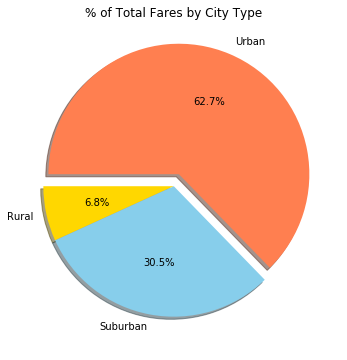

In [3]:
# Calculate Type Percents
sum_by_city_df = pyber_data.groupby("type").sum()

#Figure for the plot
fare_city_mpl = plt.figure(figsize=(6,6))

#Define the color scheme based on the dictionary
pie_sum_color = [plot_color_cfg[ctype] for ctype in sum_by_city_df.index]

#Explode settings
explode_fare = (0, 0, 0.1)

#Set title
pie_title = plt.title("% of Total Fares by City Type")

fare_by_city_pie = plt.pie(sum_by_city_df["fare"],
                           labels=sum_by_city_df.index,
                           colors=pie_sum_color,
                           autopct="%1.1f%%",
                           explode=explode_fare,
                           shadow=True,
                           radius=1,
                           startangle=180)
# Save Figure
__pie_plt_fare_path__ = os.path.join(image_path,"pie_plt_fares_by_city_type.png")
plt.savefig(__pie_plt_fare_path__)

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

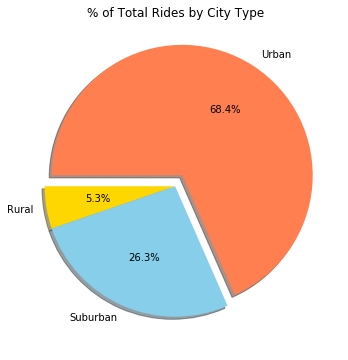

In [5]:
# Calculate Type Percents
ride_by_city_df = pyber_data.groupby("type").count()

#Figure for the plot
ride_city_mpl = plt.figure(figsize=(6,6))

#Define the color scheme based on the dictionary
ride_pie_color = [plot_color_cfg[ctype] for ctype in ride_by_city_df.index]

#Explode settings
explode_ride = (0, 0, 0.1)

#Set title
pie_ride_title = plt.title("% of Total Rides by City Type")

ride_by_city_pie = plt.pie(ride_by_city_df["driver_count"],
                           labels=ride_by_city_df.index,
                           colors=ride_pie_color,
                           autopct="%1.1f%%",
                           explode=explode_ride,
                           shadow=True,
                           radius=1,
                           startangle=180)
# Save Figure
__pie_plt_ride_path__ = os.path.join(image_path,"pie_plt_rides_by_city_type.png")
plt.savefig(__pie_plt_ride_path__)

In [6]:
# Show Figure
plt.show()

## Total Drivers by City Type

,Average Fare ($) Per City,Number of rides per city,Total Number of Drivers (Per City),Type
Bradshawfurt,40.06,10,70,Rural
Garzaport,24.12,3,21,Rural
Harringtonfort,33.47,6,24,Rural
Jessicaport,36.01,6,6,Rural
Lake Jamie,34.36,6,24,Rural
Lake Latoyabury,26.06,11,22,Rural
Michaelberg,35.00,12,72,Rural
New Ryantown,43.28,6,12,Rural
Newtonview,36.75,4,4,Rural
North Holly,29.13,9,72,Rural


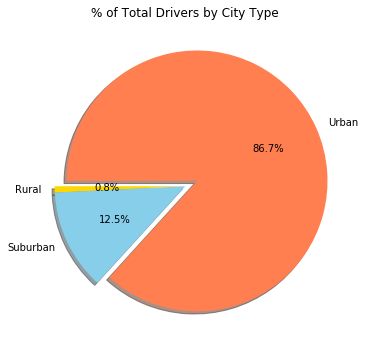

In [10]:
#We will be usinng the same data for fares, both are
#sum of values we will just pick divers info

#Figure for the plot
driver_city_mpl = plt.figure(figsize=(6,6))

#Explode settings
explode_driver = (0, 0, 0.1)

#Set title
pie_driver_title = plt.title("% of Total Drivers by City Type")

#plot the information
drvs_by_city_pie = plt.pie(sum_by_city_df["driver_count"],
                           labels=sum_by_city_df.index,
                           colors=pie_sum_color,
                           autopct="%1.1f%%",
                           explode=explode_driver,
                           shadow=True,
                           radius=1,
                           startangle=180)
# Save Figure
__pie_plt_drvs_path__ = os.path.join(image_path,"pie_plt_drivers_by_city_type.png")
plt.savefig(__pie_plt_drvs_path__)

query = 'Type == "Rural"'
temp_df = city_info_df.query(query)
temp_df

In [8]:
# Show Figure
plt.show()